In [1]:
import pandas as pd
df=pd.read_csv('test2.csv')
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [2]:
cr=df

In [3]:
pd.get_dummies(df['Country'])
#경우의 수가 많으면 column의 수가 많아짐
# feature selection, 다중공선성 등을 고려해 해결해야함

,AGO,ALB,AND,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,UGA,UKR,URY,USA,UZB,VEN,VNM,ZAF,ZMB,ZWE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sum(cr[:5])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
sum(cr[-100:]['Country_Ratio'])

In [5]:
#one-hot encoding 할때, 경우의 수가 많은 경우 처리방안
len(set(df['Country']))

126

In [6]:
top_5=cr[:5]['Country']
top_5

0    PRT
1    PRT
2    GBR
3    GBR
4    GBR
Name: Country, dtype: object

In [7]:
'GBR' in top_5
#top_5에 GBR에 있으면? -> 참거짓

False

In [8]:
def country_hot(country):
    if country in top_5:
        return country
    else:
        return 'other'

In [9]:
sample=['PRT', 'GBR', 'KOR', 'JPN']
for country in sample:
    print(country_hot(country))

other
other
other
other


In [10]:
#apply 적용
df['Country_Simple']=df['Country'].apply(lambda x: country_hot(x))
pd.get_dummies(df['Country_Simple'])
#125->6

,other
0,1
1,1
2,1
3,1
4,1
...,...
40055,1
40056,1
40057,1
40058,1


if x in top_5:
    return x
else:
    return 'other'

x if x in top_5 else 'other'

In [11]:
#차를 가져오는 경우와 아닌경우를 car_yes롤 저장
df['car_yes']=0

In [12]:
df.loc[df['RequiredCarParkingSpaces']==1]=1

In [13]:
df.loc[df['car_yes']==1]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Country_Simple,car_yes
25,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
29,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
53,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
54,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
55,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
40014,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
40022,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1
40026,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1.0,1,1,1,1,1,1


In [14]:
#답

In [15]:
set(df['RequiredCarParkingSpaces'])

{0, 1, 2, 3, 8}

In [16]:
df['car_yes']=0

In [17]:
df.loc[df['RequiredCarParkingSpaces']>0, 'car_yes']=1

In [18]:
set(df['car_yes'])

{0, 1}

In [19]:
# 고객이 예약한 상품과 고객에게 할당한 상품이 같을때와 다를때에 관한 정보 추가

In [20]:
def roomtype_Same(a, b):
    if df[a]==df[b]:
        return 1
    else:
        return 0

In [21]:
df['RoomType_Same']=[df['ReservedRoomType'],df['AssignedRoomType']].apply(roomtype_Same('ReservedRoomType', 'AssignedRoomType'))


AttributeError: 'list' object has no attribute 'apply'

In [22]:
#답 'ReservedRoomType', 'AssignedRoomType' same 여부
df=pd.read_csv('test2.csv')

In [23]:
set(df['ReservedRoomType'])

{'A               ',
 'B               ',
 'C               ',
 'D               ',
 'E               ',
 'F               ',
 'G               ',
 'H               ',
 'L               ',
 'P               '}

In [24]:
set(df['AssignedRoomType'])

{'A               ',
 'B               ',
 'C               ',
 'D               ',
 'E               ',
 'F               ',
 'G               ',
 'H               ',
 'I               ',
 'L               ',
 'P               '}

In [25]:
df['ReservedRoomType']=df['ReservedRoomType'].apply(lambda x : x[:1])

In [26]:
df['AssignedRoomType']=df['AssignedRoomType'].apply(lambda x: x[:1])
#안예쁜 데이터 변경

In [27]:
df['RA']=df['ReservedRoomType']+df['AssignedRoomType']
df['RA']

0        CC
1        CC
2        AC
3        AA
4        AA
         ..
40055    AA
40056    EE
40057    EE
40058    DD
40059    AA
Name: RA, Length: 40060, dtype: object

In [28]:
df['RA_Changed']=df['RA'].apply(lambda x : 0 if x[0]==x[1] else 1)

In [29]:
import numpy as np

In [30]:
np.mean(df['RA_Changed'])
#예약한 객실과 할당된 객실이 다른경우 : 약 20%

0.19283574638042936

In [31]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Changed'],
      dtype='object')

In [32]:
interested=['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Canged', 'RA_Changed', 'car_yes']
#day_stay, foreigner, country_Ratio, country simple

In [33]:
df[interested].to_csv('test2_modify', index=False)

KeyError: "['RA_Canged', 'car_yes'] not in index"

In [69]:
df2=pd.read_csv('test2_modify')
df2.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


# EDA
- 그래프를 그리기 위해 column골라야 함


In [ ]:
df.describe().columns

In [34]:
label='IsCanceled'
features=['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'RA_Canged',
       'RA_Changed', 'car_yes']
#

In [35]:
x, y=df[features], df[label]
#column수가 많음 -> 경우의 수를 줄이는데 중점 -> embed방식 활용

KeyError: "['RA_Canged', 'car_yes'] not in index"

In [36]:
#영향력이 가장 높은것은?

#1. module import
#2. model 생성
#3. feature_importances_
#4. 정렬

In [37]:
#안됨

In [38]:
from sklearn.ensemble import RandomForestClassifier as rf

In [39]:
model=rf()
model.fit(x, y)

NameError: name 'x' is not defined

In [ ]:
from sklearn.feature_selection import RFE
selector=RFE(model)
selector.fit(x, y)

In [ ]:
rfe_df=pd.DataFrame()
rfe_df['rank']=selector.ranking_
rfe_df['feature']=features
rfe_df.sort_values(by='rank')

In [40]:
##embed

In [41]:
#1
from sklearn.ensemble import RandomForestClassifier as rf

In [42]:
#2
model=rf()
model.fit(x, y)

NameError: name 'x' is not defined

In [43]:
model

RandomForestClassifier()

In [44]:
model.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#3
ft_imp=pd.DataFrame()
ft_imp['importance']=model.feature_importances_
ft_imp['feature']=features

In [45]:
ft_imp

NameError: name 'ft_imp' is not defined

In [46]:
#4
ft_imp_sort=ft_imp.sort_values(by='importance', ascending=False)
ft_imp_sort
#leadtime - 얼마나 전에 예약했나

NameError: name 'ft_imp' is not defined

In [47]:
df.groupby('LeadTime').agg({label:np.mean}).reset_index()

#LeadTime이 0이면 당일예약, 1이면 하루전 예약을 의미


,LeadTime,IsCanceled
0,0,0.048517
1,1,0.055172
2,2,0.091587
3,3,0.079345
4,4,0.066365
...,...,...
407,471,1.000000
408,532,0.000000
409,542,0.000000
410,709,0.000000


In [48]:
tgt=df.groupby('LeadTime').agg({label:np.mean}).reset_index()

In [49]:
import seaborn as sns

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

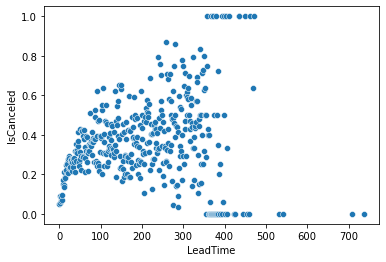

In [50]:
tgt1=tgt.loc[tgt['LeadTime']<80]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

In [51]:
#일주일 전에 예약한 고객은 예약 취소율이 낮음
#LeadTime이 늘어날 수록 취소율이 높아짐
#20-40사이에 예약한 고객은 20-30%정도 취소율을 보임
#20일 기준/-/형태
#50일 기준 무작위로 퍼진 형태
#LeadTime이 적은 구간에서 선형성을 지님

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

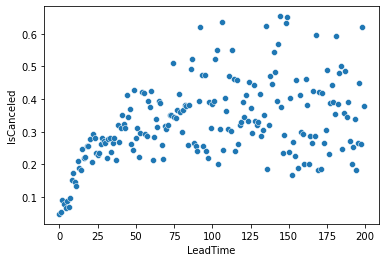

In [52]:
tgt2=tgt.loc[tgt['LeadTime']<200]
sns.scatterplot(data=tgt2, x='LeadTime', y='IsCanceled')

In [53]:
hue='Foreigner'
df.groupby(['LeadTime', hue]).agg({label:np.mean})

KeyError: 'Foreigner'

In [ ]:
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

In [54]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Changed'],
      dtype='object')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

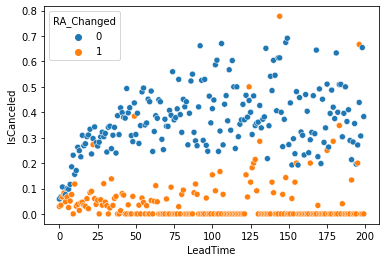

In [55]:
hue='RA_Changed'
df.groupby(['LeadTime', hue]).agg({label:np.mean})
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

In [56]:
hue='car_yes'
df.groupby(['LeadTime', hue]).agg({label:np.mean})
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

KeyError: 'car_yes'

In [70]:
df2.columns
#'MarketSegment'- 예약 경로

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'RA', 'RA_Canged', 'RA_Changed', 'car_yes'],
      dtype='object')

In [62]:
#어떤 경로로 예약했는지에 대한 column을 기반으로 의미있는 문장을 도출하시오
set(df['MarketSegment'])

{'Complementary',
 'Corporate',
 'Direct',
 'Groups',
 'Offline TA/TO',
 'Online TA'}

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

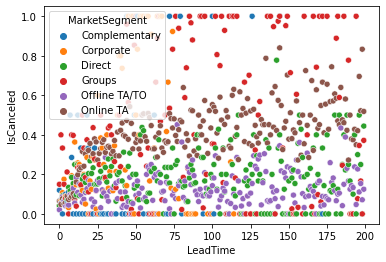

In [63]:
hue='MarketSegment'
df.groupby(['LeadTime', hue]).agg({label:np.mean})
tget=df.groupby(['LeadTime', hue]).agg({label:np.mean}).reset_index()
tget=tget.loc[tget['LeadTime']<200]
sns.scatterplot(data=tget, x='LeadTime', y='IsCanceled', hue=hue)

In [ ]:
#onlineTA는 평균분포와 비슷
#offilineTA/TO도 평균분포와 비슷하지만 취소율이 현저히 낮다
#Complementary는 0or1으로 배체
#Group도 비슷
#회사를 통한 Corporate는 주로 짧은 기간 예약이고 취소율이 낮다

#offline으로 예약한 경우 online 대비 취소율 낮다

# Data Preparation
- train용 모델링 위한 데이터준비

In [72]:
#train, test split
train, test= df2[0::2], df2[1::2]

train, test=train.reset_index() , test.reset_index()
features

['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'RA_Canged',
 'RA_Changed',
 'car_yes']

In [73]:
x_train, y_train=train[features], train[label]
x_test, y_test=test[features], test[label]

# Modeling
- Tree구조 알고리즘을 이요해 내부가 어떻게 생겼는지 파악

In [79]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import export_graphviz as eg
#데이터셋을 트리구조로 만들어줌


model=dt(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [80]:
eg(model, out_file='tree.txt', feature_names=features, class_names=['cancel_no', 'cancel_yes'])
#시각화 https://dreampuf.github.io/GraphvizOnline
#상하관계 - 부모자식 관계
#수평관계 - 형제관계
#특정 feature기준 true, false
#samples학슴에 사용된 row의 수(value 두개 더한값이 sample)
#value는 true, false 개수 
#truefalse 기준 - class ox
#자식들 samplse 더하면 부모 smaples
#gini가 0인것 찾으면 됨 - 분류가 100완료됨 - value의 값이 한쪽에 몰림[0, n]
#gini - 불순도(inqurity)


#country Ratio<n(가까운나라) 일때 true-> PriviousCancellations<y(전에 취소해봤으면)false->gini=0는 1확률로 취소함



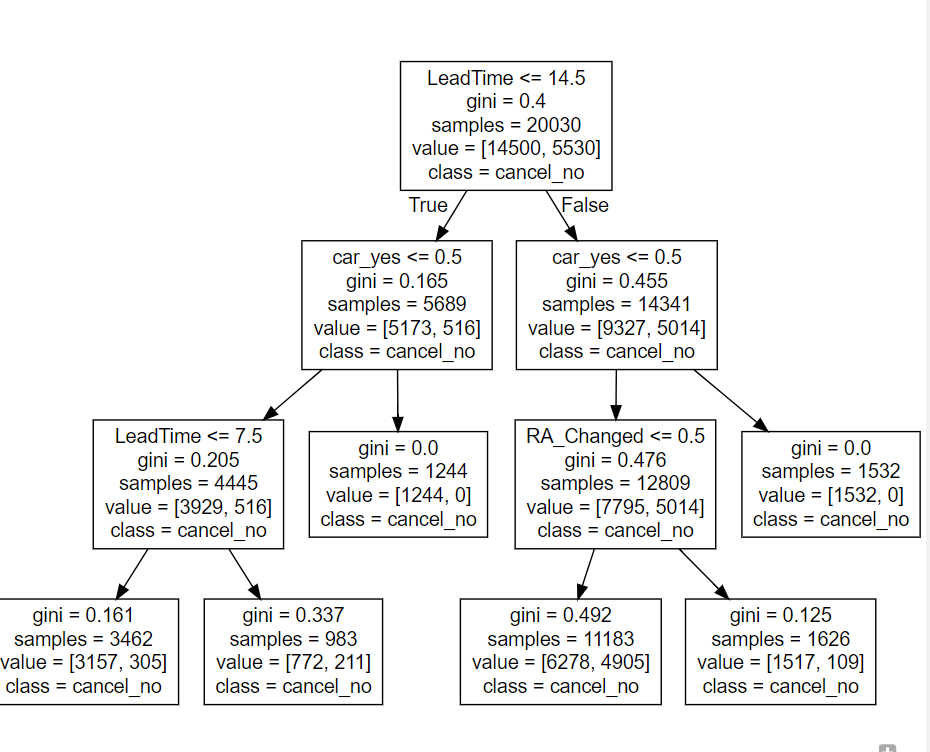

왼쪽 gini=0해석
예약일 2주 이내에 예약한 사람들 중에 차를 가지고 왔다면 취소하지 않았다 

오른쪽 해석
예약일 2주보다 이전에 예약한 사람들중 차를 갖고 온사람은 취소하지 않았다

근데 내꺼 왜 calcel_yes없냐

## 지니계수 계산방식
- 불평등의 정도를 계수화
- 불순도를 확인
- 특정 사건이 일어날 확률을 yes_prob, 일어나지 않을 확률을 no_prob
- yes_prob * (1-yes_prob)-->A
- no_prob* (1-no_prob)-->B
- 라 한다면 A+B가 지니계수임

In [81]:
size=8815
yes_prob=3726/size
no_prob=5089/size
A=yes_prob * (1-yes_prob)
B=no_prob* (1-no_prob)
print(A+B)

0.4880458945443443


In [82]:
yes_prob=0.0
no_prob=1
A=yes_prob * (1-yes_prob)
B=no_prob* (1-no_prob)
print(A+B)

0.0


# 알고리즘 구분용 용어
- ensemble(앙상블) - 여러개의 의견을 가지고 학습을 진행하는 방식 
    - 정형 데이터를 다루는데 가장 뛰어난 성과를 내는 알고리즘
    - 여러개의 모델을 훈련, 각 모델의 의견을 취합하여 하나의 의견을 도출
        - 대부분 decision이지만 회귀, 분류 등 다양하게 할수있
        - Random Forest, Extra Tree, Gradient Boosting
    
- bagging(앙상블 방식중 하나) - bootstrap으로 추출된 값들의 통계량을 계산
- boosting(앙상블에 포함) - 오답을 이용해 점수 상승을 도모 
    - 이전 모델의 오답을 새로운 정보로 사용

## bagging
- bootstrap으로 추출된 여러개의 결과를 합산해 사용하는 방식
- 결과를 모아모아 투표로 결론도출
### bootstrap
- 데이터셋의 row를 무작위로 복원추출해 새로운 데이터셋 생성
- 중복된 row 가능
- 새로운 데이터셋을 만들때마다 row의 구성이 조금씩 달라짐
- 서로 조금씩 다른 데이터셋을 n개 만들고, n개의 데이터셋에 대해 학습을 진행
- n개의 학습된 예측결과를 합산
- Random Forest는 bagging의 대표적인 방식임



## boosting
- 요즘 핫함
- 오답을 이용
- 이전 모델의 오차를 보완하는 방향으로 만들어짐
- 이전모델의 학습이 끝나고 수행되기 때문에 속도가 느림
- 오답을 이용해 점수 상승을 도모
- 오답을 새로운 정보로 이용하는 접근법 통칭
- 학습 후 문제를 풀고, 못 맞추는 정보를 새로운 정보로 이용
- 1번 학습, 1번의 오차정보를 정답으로 하여 2번 학습, 같은방법으로 3번 학습
- n번째 알고리즘은 n-1번째 알고리즘의 오차를 label로 학습
- 오차를 줄이는 것이 boosting의 핵심
- 정형데이터 기준 가장 정확도 높은 알고리즘(잘사용했을 시)
- 잘못사용하면 다른알고리즘보다 정확도 낮음


## GBDT(Gradient Boosted Decision Tree)
- 디시전 트리(결정트리) 이용 이전 트리의 오차 보완
- 경사하강법 사용 ensemble 하는 방섭
- ex) XGBoost, CatBoost, LightGBM
- bagging은 병렬처리가 가능하지만 boosting은 병렬처리가 안됨
- XGBoost는 기존 boosting의 문제점을 보완해 병렬처리가 어느정도 가능하게 함


#### boosting계열 알고리즘의 단점
- 속도가 느림
- 과적합 쉽게 발생
- 대충 사용하면 다른 알고리즘보다 성능이 안좋음 - > Tunning


### Class Regressier 차이 확인

## 분류문제의 평가지표
- 시험 많이 출제
- 회귀 문제에서는 숫자의 크기를 이용해 틀림의 정도를 나타냄 
    - 분류문제에서는 사용 x
- 혼동행렬 개념 도입

In [85]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as dt

In [86]:
label='IsCanceled'
features=['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'RA_Canged',
       'RA_Changed', 'car_yes']
#train, test split
train, test= df2[0::2], df2[1::2]
train, test=train.reset_index() , test.reset_index()

x_train, y_train=train[features], train[label]
x_test, y_test=test[features], test[label]

model=dt(max_depth=5)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [87]:
#예측값
model.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
#실제값
y_test

0        0
1        0
2        0
3        0
4        1
        ..
20025    0
20026    0
20027    0
20028    0
20029    0
Name: IsCanceled, Length: 20030, dtype: int64

In [89]:
for_plot=pd.DataFrame()
for_plot['predict']=model.predict(x_test)
for_plot['actual']=y_test
for_plot

,predict,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
20025,0,0
20026,0,0
20027,0,0
20028,0,0


# 혼동행렬의 지표
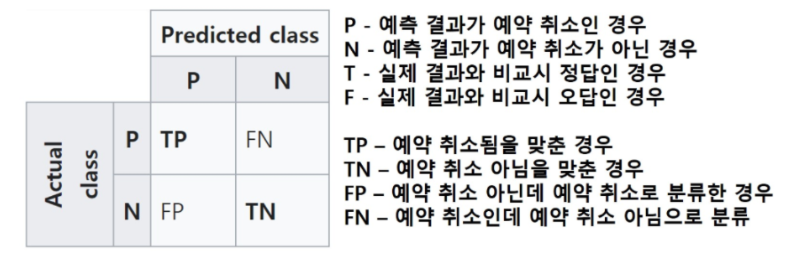

Positive - 예측결과가 1
Nagative - " 0
True - 결과가 맞음
False - 결과가 틀림

# 자주 사용하는 분류문제의 평가지표
1. accuracy - 정확도 - 맞춤/전체 비율 
- acc=(TP+TN) / (TP+TN+FP+FN)
2. 